In [1]:
## Let's go ahead and start with some imports
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr

## For reading stock data from yahoo and nse
import fix_yahoo_finance as yf
yf.pdr_override()
from nsepy import get_history

## F or time stamps
from datetime import timedelta
from datetime import date
import calendar

## For stats
import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm

## For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

C:\Users\moodmyntra\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
today = date.today()

In [3]:
bank_data = get_history(symbol='HDFCBANK', start=date(2014,1,1), end=today)
nifty_data= get_history(symbol='NIFTY', start=date(2014,1,1), end=today,index=True)

df=pd.DataFrame(bank_data)
df_1=pd.DataFrame(nifty_data)

In [4]:
nifty = pd.DataFrame({"NIFTY":nifty_data['Close']})
hdfc = pd.DataFrame({"HDFC":bank_data['Close']})

In [5]:
data=pd.concat([nifty,hdfc],axis=1)

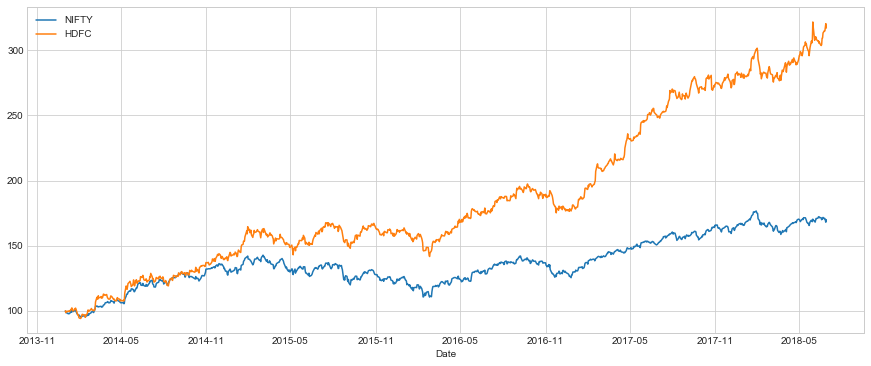

In [6]:
(data/data.iloc[0]*100).plot(figsize=(15,6));
plt.show()

In [7]:
log_returns=np.log(1+hdfc.pct_change())

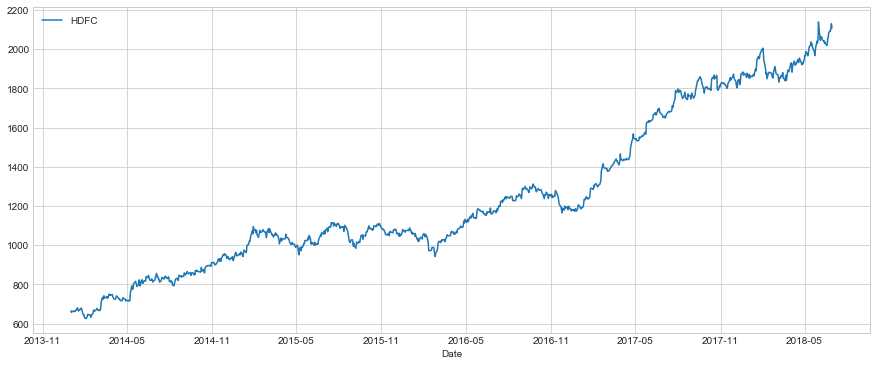

In [8]:
hdfc.plot(figsize=(15,6));

In [9]:
hdfc_mean=log_returns.mean()

In [10]:
hdfc_var=log_returns.var()

In [11]:
hdfc_drift=hdfc_mean-(0.5*hdfc_var)

In [12]:
hdfc_stdev=log_returns.std()

In [13]:
np.array(hdfc_drift)

array([0.00098286])

In [14]:
norm.ppf(0.95)

1.6448536269514722

In [15]:
x=np.random.rand(10,2)

In [16]:
norm.ppf(x)

array([[-1.10038618,  0.06513032],
       [-0.3492926 ,  0.97187248],
       [ 1.58739506,  0.19475187],
       [ 0.98960961,  1.22572089],
       [-1.1158001 , -0.4755369 ],
       [-0.51600017,  0.16259466],
       [ 0.12670781,  1.23530726],
       [ 0.05269007,  0.30549256],
       [-0.95257291,  0.32529411],
       [ 0.55261947, -0.1554859 ]])

In [17]:
z=norm.ppf(np.random.rand(10,2))

In [18]:
t_intervals=1000
iterations=10

In [19]:
daily_returns=np.exp(hdfc_drift.values+hdfc_stdev.values*norm.ppf(np.random.rand(t_intervals,iterations)))

In [20]:
S0=hdfc.iloc[-1]

In [21]:
price_list=np.zeros_like(daily_returns)

In [22]:
price_list[0]=S0

In [23]:
for t in range(1,t_intervals):
    price_list[t]=price_list[t-1]*daily_returns[t]

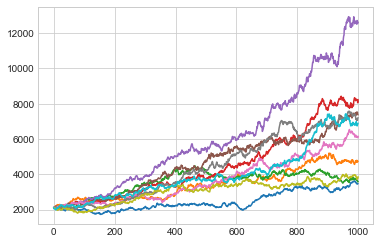

In [24]:
plt.Figure(figsize=(10,6))
plt.plot(price_list);